In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv('D:/Semester 6/Data Mining/final/Datafp.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [39]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [40]:
data.isnull().values.any()

False

In [41]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [42]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [43]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [44]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [45]:
data.duplicated().sum()

0

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
min_amount = data["amount"].min()
max_amount = data["amount"].max()
print("Nilai minimum dari variabel 'amount':", min_amount)
print("Nilai maksimum dari variabel 'amount':", max_amount)

Nilai minimum dari variabel 'amount': 0.0
Nilai maksimum dari variabel 'amount': 92445516.64


In [7]:
import pandas as pd
import string

# Mendefinisikan jumlah kelas dan alfabet
n_classes = 24
labels = list(string.ascii_uppercase[:n_classes])  # Mengambil n_classes alfabet pertama

# Menghitung rentang nilai dan lebar interval
min_value = 0
max_value = 92445516.64
range_values = max_value - min_value
interval = range_values / n_classes

# Membuat kategori baru berdasarkan rentang pada variabel "amount" dan lambangkan dengan alfabet
bins = [min_value + (interval * i) for i in range(n_classes+1)]
data['amount_category'] = pd.cut(data['amount'], bins=bins, labels=labels)

# Menampilkan hasil
print(data[['amount', 'amount_category']].head())

     amount amount_category
0   9839.64               A
1   1864.28               A
2    181.00               A
3    181.00               A
4  11668.14               A


In [49]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_category
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,A
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,A
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,A
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,A
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,A
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,B
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,B
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,A


In [8]:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

In [9]:
print("Fraud transactions : \n",fraud.amount_category.value_counts())
print("\n Valid transactions : \n",valid.amount_category.value_counts())

Fraud transactions : 
 A    7253
B     514
C     430
N       0
W       0
V       0
U       0
T       0
S       0
R       0
Q       0
P       0
O       0
M       0
L       0
K       0
J       0
I       0
H       0
G       0
F       0
E       0
D       0
X       0
Name: amount_category, dtype: int64

 Valid transactions : 
 A    6339600
B       7845
C       4911
D        711
E        448
F        264
G        181
H        119
I        108
J         81
K         45
M         31
N         18
L         16
O         10
P          7
Q          5
S          3
R          2
T          1
X          1
U          0
V          0
W          0
Name: amount_category, dtype: int64


In [10]:
# Filter data dengan nilai 'amount' di atas atau sama dengan 1
above_1 = data[data['amount'] >= 1]
jumlah_above_1 = above_1.shape[0]
print("Jumlah data dengan amount di atas atau sama dengan 1:", jumlah_above_1)

# Filter data dengan nilai 'amount' di bawah 1
below_1 = data[data['amount'] < 1]
jumlah_below_1 = below_1.shape[0]
print("Jumlah data dengan amount di bawah 1:", jumlah_below_1)

# Hapus data dengan nilai 'amount' di bawah 1 dari DataFrame
data = data.drop(below_1.index)

# Buat DataFrame baru dari data yang telah dihapus
data_new = above_1.copy()

# Print jumlah data dengan amount di bawah 1 yang telah dihapus
jumlah_deleted_below_1 = below_1.shape[0]
print("Jumlah data dengan amount di bawah 1 yang telah dihapus:", jumlah_deleted_below_1)

Jumlah data dengan amount di atas atau sama dengan 1: 6362488
Jumlah data dengan amount di bawah 1: 132
Jumlah data dengan amount di bawah 1 yang telah dihapus: 132


In [53]:
data_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_category
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,A
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,A
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,A
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,A
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,A
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,B
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,B
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,A


In [54]:
print(data_new.type.value_counts())

CASH_OUT    2237481
PAYMENT     2151388
CASH_IN     1399280
TRANSFER     532909
DEBIT         41430
Name: type, dtype: int64


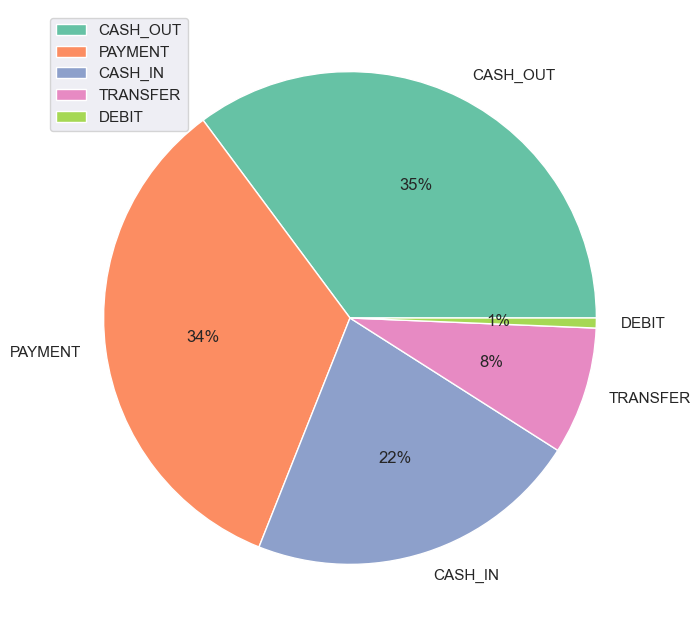

In [55]:
type = data_new['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

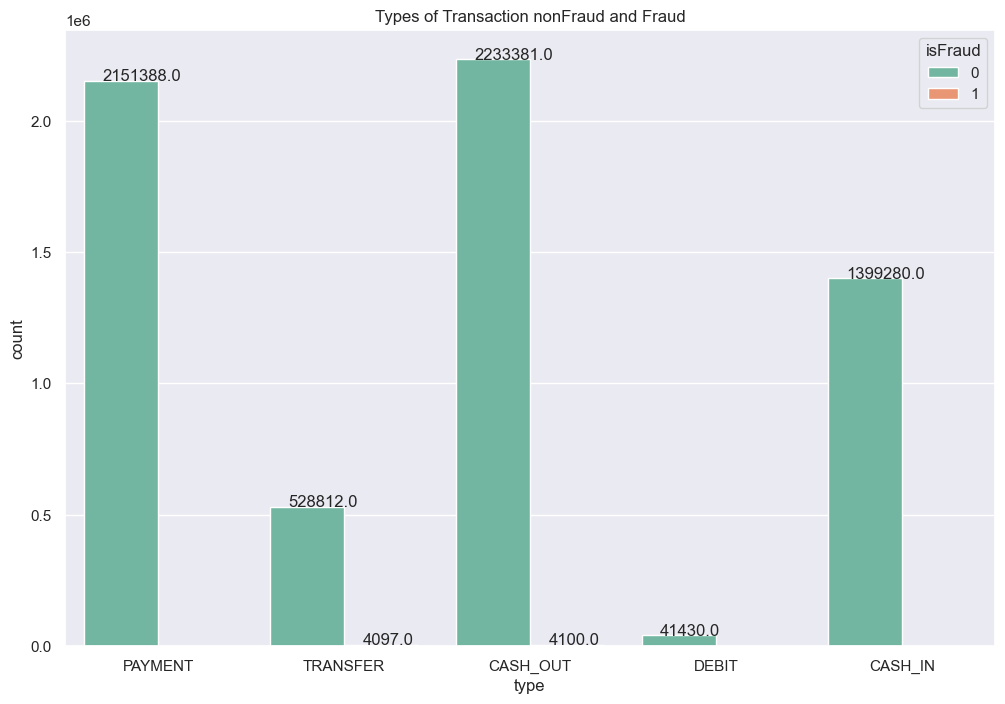

In [56]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = data_new)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [11]:
dataFraudTransfer = data.loc[(data_new.isFraud == 1) & (data_new.type == 'TRANSFER')]
dataFraudCashout = data.loc[(data_new.isFraud == 1) & (data_new.type == 'CASH_OUT')]

print ('\n Total Fraud pada TRANSFER = {}'.\
       format(len(dataFraudTransfer)))

print ('\n Total Fraud pada CASH_OUT = {}'.\
       format(len(dataFraudCashout)))


 Total Fraud pada TRANSFER = 4097

 Total Fraud pada CASH_OUT = 4100


In [58]:
data1=data_new[(data_new['isFraud']==1) & (data_new['type']=='TRANSFER')]
data1['nameDest'].value_counts()

C553264065     1
C988859148     1
C1287650869    1
C922180689     1
C131895413     1
              ..
C776246900     1
C1234144009    1
C571016162     1
C1381364691    1
C2080388513    1
Name: nameDest, Length: 4097, dtype: int64

In [59]:
data2=data_new[(data_new['isFraud']==1) & (data_new['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()

C840083671     1
C1729864710    1
C1173355296    1
C1342251524    1
C21638411      1
              ..
C1792382836    1
C1843566745    1
C58682758      1
C570536992     1
C1280323807    1
Name: nameOrig, Length: 4100, dtype: int64

In [12]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [13]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

#Memeriksa apakah rekening penerima transfer penipuan digunakan sebagai rekening pengirim untuk pencairan 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

In [14]:
# adding feature type1
data_new1 = data_new.copy() # creating copy of dataset in case I need original dataset
data_new1["Type2"] = np.nan # initializing feature column

# filling feature column
data_new1.loc[data_new.nameOrig.str.contains('C') & data_new.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new1.loc[data_new.nameOrig.str.contains('C') & data_new.nameDest.str.contains('M'),"Type2"] = "CM"
data_new1.loc[data_new.nameOrig.str.contains('M') & data_new.nameDest.str.contains('C'),"Type2"] = "MC"
data_new1.loc[data_new.nameOrig.str.contains('M') & data_new.nameDest.str.contains('M'),"Type2"] = "MM"

In [15]:
fraud = data_new1[data_new1["isFraud"] == 1]
valid = data_new1[data_new1["isFraud"] == 0]

In [16]:
print("Fraud transactions type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions type1: \n",valid.Type2.value_counts())

Fraud transactions type1: 
 CC    8197
Name: Type2, dtype: int64

 Valid transactions type1: 
 CC    4202903
CM    2151388
Name: Type2, dtype: int64


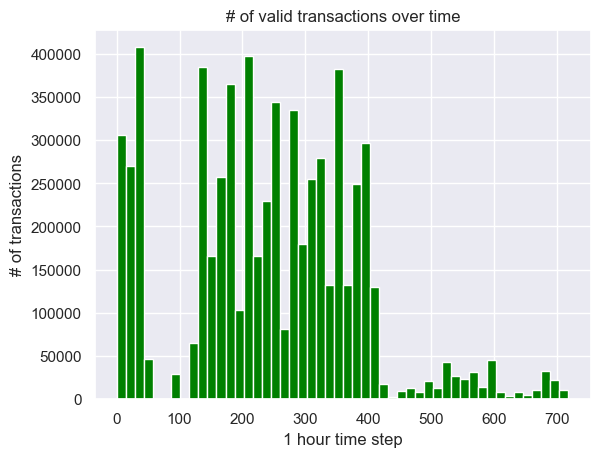

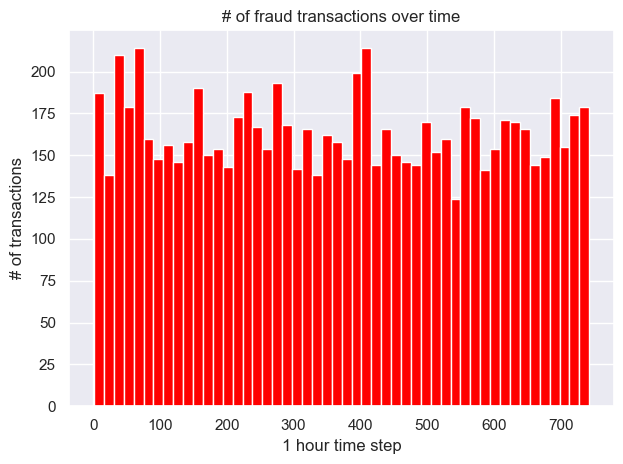

In [68]:
#HISTOGRAM FRAUD & VALID KESELURUHAN
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

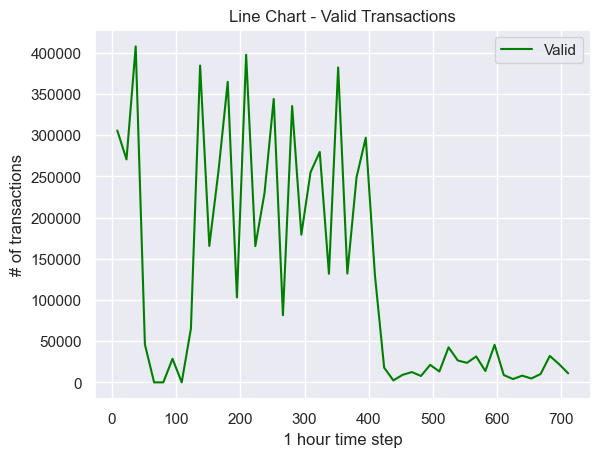

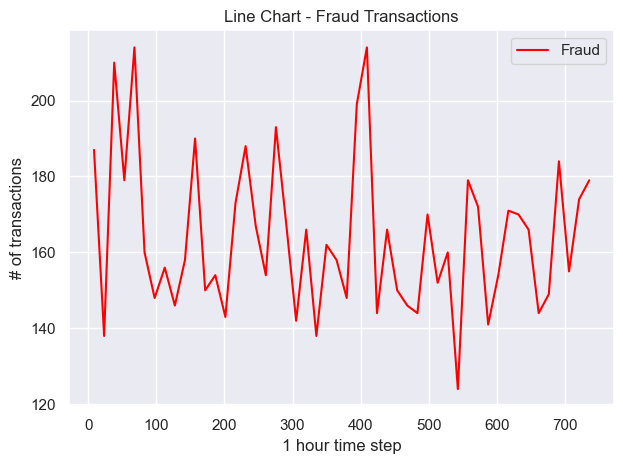

In [72]:

bins = 50

valid_midpoints = (valid_bins[:-1] + valid_bins[1:]) / 2

plt.figure()  # Membuat figure baru untuk line chart valid
plt.plot(valid_midpoints, valid_counts, color="green", label="Valid")
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("Line Chart - Valid Transactions")
plt.legend()

fraud_midpoints = (fraud_bins[:-1] + fraud_bins[1:]) / 2

plt.figure()  # Membuat figure baru untuk line chart fraud
plt.plot(fraud_midpoints, fraud_counts, color="red", label="Fraud")
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("Line Chart - Fraud Transactions")
plt.legend()

plt.tight_layout()
plt.show()


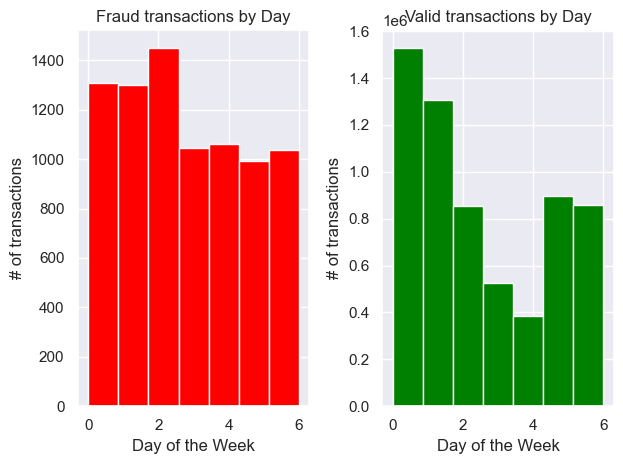

In [73]:
#HISTOGRAM VALID & FRAUD PER HARI (1 MINGGU)
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

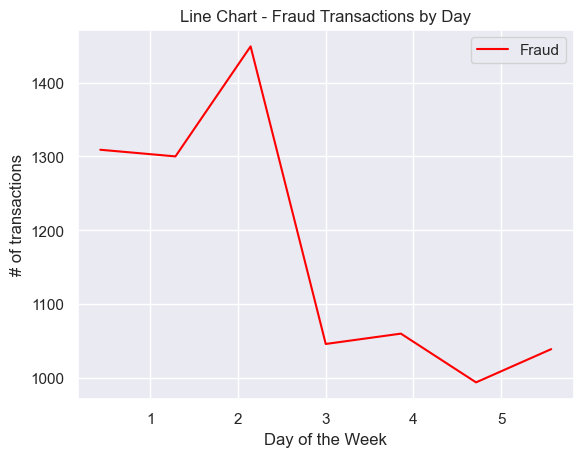

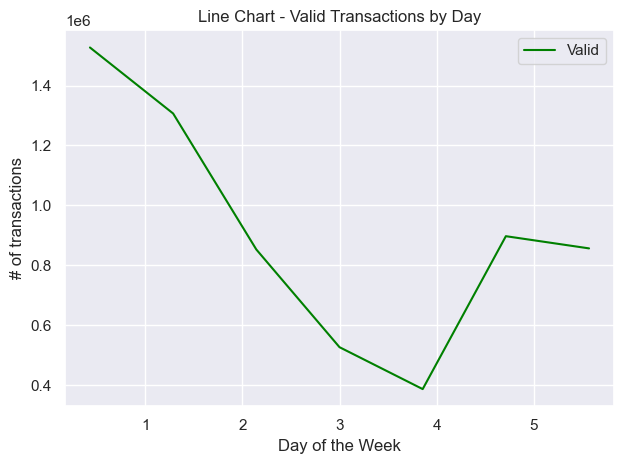

In [77]:
fraud_day_counts, fraud_day_bins = np.histogram(fraud_days, bins=num_days)
fraud_day_midpoints = (fraud_day_bins[:-1] + fraud_day_bins[1:]) / 2

valid_day_counts, valid_day_bins = np.histogram(valid_days, bins=num_days)
valid_day_midpoints = (valid_day_bins[:-1] + valid_day_bins[1:]) / 2

plt.figure()  # Membuat figure baru untuk line chart fraud per hari
plt.plot(fraud_day_midpoints, fraud_day_counts, color="red", label="Fraud")
plt.xlabel('Day of the Week')
plt.ylabel('# of transactions')
plt.title('Line Chart - Fraud Transactions by Day')
plt.legend()

plt.figure()  # Membuat figure baru untuk line chart valid per hari
plt.plot(valid_day_midpoints, valid_day_counts, color="green", label="Valid")
plt.xlabel('Day of the Week')
plt.ylabel('# of transactions')
plt.title('Line Chart - Valid Transactions by Day')
plt.legend()

plt.tight_layout()
plt.show()

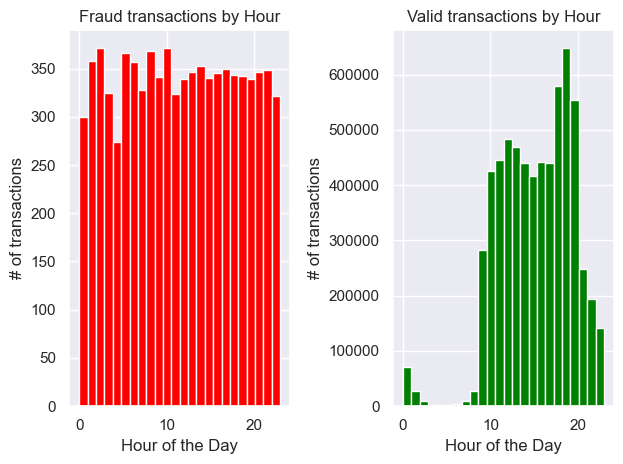

In [78]:
#FRAUD & VALID DALAM 24 JAM PER HARI
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

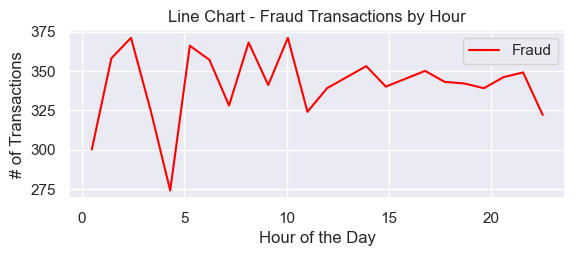

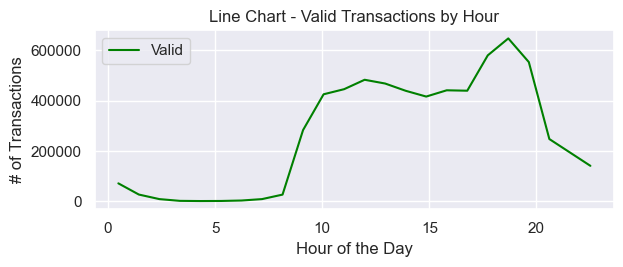

In [79]:
# Line Chart - Fraud Transactions
plt.figure()

fraud_hour_counts, fraud_hour_bins, _ = plt.hist(fraud_hours, bins=num_hours, alpha=0)
fraud_hour_midpoints = (fraud_hour_bins[:-1] + fraud_hour_bins[1:]) / 2

plt.subplot(2, 1, 1)
plt.plot(fraud_hour_midpoints, fraud_hour_counts, color="red", label="Fraud")
plt.xlabel('Hour of the Day')
plt.ylabel('# of Transactions')
plt.title('Line Chart - Fraud Transactions by Hour')
plt.legend()

# Line Chart - Valid Transactions
plt.figure()

valid_hour_counts, valid_hour_bins, _ = plt.hist(valid_hours, bins=num_hours, alpha=0)
valid_hour_midpoints = (valid_hour_bins[:-1] + valid_hour_bins[1:]) / 2

plt.subplot(2, 1, 2)
plt.plot(valid_hour_midpoints, valid_hour_counts, color="green", label="Valid")
plt.xlabel('Hour of the Day')
plt.ylabel('# of Transactions')
plt.title('Line Chart - Valid Transactions by Hour')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
data_new1["HourOfDay"] = np.nan # initializing feature column
data_new1.HourOfDay = data_new1.step % 24

In [18]:
data_new1 = data_new1.drop(["isFlaggedFraud",'nameOrig','nameDest','amount_category'],1)

In [19]:
data_new1 = pd.get_dummies(data_new1,prefix=['type','Type2'],drop_first=True)

In [83]:
data_new1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,HourOfDay,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Type2_CM
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,1,0,0,1,0,1
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,1,0,0,1,0,1
2,1,181.00,181.00,0.00,0.00,0.00,1,1,0,0,0,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,1,1,0,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,23,1,0,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,23,0,0,0,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,23,1,0,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,23,0,0,0,1,0


In [20]:
#MODELLING
X = data_new1.drop("isFraud",1)
y = data_new1.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [21]:
from imblearn.under_sampling import RandomUnderSampler
import time
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
#RANDOMFORREST (RUS)
rus = RandomUnderSampler(sampling_strategy=0.2)
X_res, y_res = rus.fit_resample(X_train, y_train)

start_time = time.time()

RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)
RF.fit(X_train, y_train)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train, y_predtrain))
print("Confusion Matrix Test:\n",CM_RF)
print("Classification Report Test:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision Test:", precision_score(y_test, y_pred))
print("Precision Train:", precision_score(y_train, y_predtrain))
print("Recall Test:", recall_score(y_test, y_pred))
print("Recall Train:", recall_score(y_train, y_predtrain))
print("F1 Test:", f1_score(y_test, y_pred))
print("F1 train:", f1_score(y_train, y_predtrain))
print("Area under precision (AUC) Recall Test:", average_precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall Train:", average_precision_score(y_train, y_predtrain))

end_time = time.time()

execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

Accuracy test: 0.9997296655019231
Accuracy train: 0.9999840733163924
Confusion Matrix Test:
 [[1588516      22]
 [    408    1676]]
Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588538
           1       0.99      0.80      0.89      2084

    accuracy                           1.00   1590622
   macro avg       0.99      0.90      0.94   1590622
weighted avg       1.00      1.00      1.00   1590622

Confusion Matrix Train Data:
 [[4765750       3]
 [     73    6040]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765753
           1       1.00      0.99      0.99      6113

    accuracy                           1.00   4771866
   macro avg       1.00      0.99      1.00   4771866
weighted avg       1.00      1.00      1.00   4771866

Precision Test: 0.9870435806831567
Precision Train: 0.9995035578355121
Recall Tes

In [23]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Check if the model is overfitting
if cm[0, 0] == y_test.sum() and cm[1, 1] == y_test.sum():
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Confusion Matrix:
[[1588516      22]
 [    408    1676]]
Model is not overfitting


In [24]:
#RANDOM FORREST (STRATIFIED)

# Definisikan metode StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Bagi data menjadi subset pelatihan dan pengujian
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
start_time = time.time()

RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)

RF.fit(X_train, y_train)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train, y_predtrain))
print("Confusion Matrix Test:\n",CM_RF)
print("Classification Report Test:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision Test:", precision_score(y_test, y_pred))
print("Precision Train:", precision_score(y_train, y_predtrain))
print("Recall Test:", recall_score(y_test, y_pred))
print("Recall Train:", recall_score(y_train, y_predtrain))
print("F1 Test:", f1_score(y_test, y_pred))
print("F1 train:", f1_score(y_train, y_predtrain))
print("Area under precision (AUC) Recall Test:", average_precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall Train:", average_precision_score(y_train, y_predtrain))

end_time = time.time()

execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

Accuracy test: 0.9997139484698601
Accuracy train: 0.9999848722689043
Confusion Matrix Test:
 [[1270832      27]
 [    337    1302]]
Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270859
           1       0.98      0.79      0.88      1639

    accuracy                           1.00   1272498
   macro avg       0.99      0.90      0.94   1272498
weighted avg       1.00      1.00      1.00   1272498

Confusion Matrix Train Data:
 [[5083431       1]
 [     76    6482]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083432
           1       1.00      0.99      0.99      6558

    accuracy                           1.00   5089990
   macro avg       1.00      0.99      1.00   5089990
weighted avg       1.00      1.00      1.00   5089990

Precision Test: 0.9796839729119639
Precision Train: 0.9998457504241863
Recall Tes

In [25]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Check if the model is overfitting
if cm[0, 0] == y_test.sum() and cm[1, 1] == y_test.sum():
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Confusion Matrix:
[[1270832      27]
 [    337    1302]]
Model is not overfitting


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, average_precision_score

In [151]:
#LOGISTIC REGRESSION (RUS)

X = data_new1.drop("isFraud",1)
y = data_new1.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_res, y_res = rus.fit_resample(X_train, y_train)
    
start_time = time.time()

clf = LogisticRegression()
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)
print("Accuracy Test:", accuracy_score(y_test, y_pred))
print("Accuracy Train:", accuracy_score(y_train, y_predtrain))
print("Confusion Matrix Test:\n",CM_LR)
print("Classification Report Test:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision Test:", precision_score(y_test, y_pred))
print("Precision Train:", precision_score(y_train, y_predtrain))
print("Recall Test:", recall_score(y_test, y_pred))
print("Recall Train:", recall_score(y_train, y_predtrain))
print("F1 Test:", f1_score(y_test, y_pred))
print("F1 Train:", f1_score(y_train, y_predtrain))
print("Area under precision (AUC) Recall Test:", average_precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall Train:", average_precision_score(y_train, y_predtrain))

end_time = time.time()

execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

Accuracy Test: 0.9770171668693127
Accuracy Train: 0.9770184242390713
Confusion Matrix Test:
 [[1552877   35684]
 [    873    1188]]
Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1588561
           1       0.03      0.58      0.06      2061

    accuracy                           0.98   1590622
   macro avg       0.52      0.78      0.52   1590622
weighted avg       1.00      0.98      0.99   1590622

Confusion Matrix Train:
 [[4658594  107136]
 [   2529    3607]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   4765730
           1       0.03      0.59      0.06      6136

    accuracy                           0.98   4771866
   macro avg       0.52      0.78      0.53   4771866
weighted avg       1.00      0.98      0.99   4771866

Precision Test: 0.032219570405727926
Precision Train: 0.032570907416270105
Recall Test: 0.5

In [152]:
#LOGISTIC REGRESSION (stratified)

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Bagi data menjadi subset pelatihan dan pengujian
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
# Membuat objek StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Mendapatkan train dan test index
train_index, test_index = next(sss.split(X, y))

# Memisahkan data train dan test
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

start_time = time.time()

# Inisialisasi dan fitting model Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)
print("Accuracy Test:", accuracy_score(y_test, y_pred))
print("Accuracy Train:", accuracy_score(y_train, y_predtrain))
print("Confusion Matrix Test:\n",CM_LR)
print("Classification Report Test:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision Test:", precision_score(y_test, y_pred))
print("Precision Train:", precision_score(y_train, y_predtrain))
print("Recall Test:", recall_score(y_test, y_pred))
print("Recall Train:", recall_score(y_train, y_predtrain))
print("F1 Test:", f1_score(y_test, y_pred))
print("F1 Train:", f1_score(y_train, y_predtrain))
print("Area under precision (AUC) Recall Test:", average_precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall Train:", average_precision_score(y_train, y_predtrain))

end_time = time.time()

execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

Accuracy Test: 0.9991489181122485
Accuracy Train: 0.9991499000980355
Confusion Matrix Test:
 [[1270662     197]
 [    886     753]]
Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270859
           1       0.79      0.46      0.58      1639

    accuracy                           1.00   1272498
   macro avg       0.90      0.73      0.79   1272498
weighted avg       1.00      1.00      1.00   1272498

Confusion Matrix Train:
 [[5082600     832]
 [   3495    3063]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083432
           1       0.79      0.47      0.59      6558

    accuracy                           1.00   5089990
   macro avg       0.89      0.73      0.79   5089990
weighted avg       1.00      1.00      1.00   5089990

Precision Test: 0.7926315789473685
Precision Train: 0.786392811296534
Recall Test: 0.459426

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, average_precision_score

In [155]:
#GAUSSIAN NAIVE BAYES (RUS)

# Menggunakan Random Under Sampler
rus = RandomUnderSampler(sampling_strategy=0.2)
X_res, y_res = rus.fit_resample(X_train, y_train)

start_time = time.time()

clf = GaussianNB()
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_GNB = confusion_matrix(y_test,y_pred)
CR_GNB = classification_report(y_test,y_pred)
CM_GNBtrain = confusion_matrix(y_train,y_predtrain)
CR_GNBtrain = classification_report(y_train,y_predtrain)
print("Accuracy Test:", accuracy_score(y_test, y_pred))
print("Accuracy Train:", accuracy_score(y_train, y_predtrain))
print("Confusion Matrix Test:\n",CM_GNB)
print("Classification Report Test:\n",CR_GNB)
print("Confusion Matrix Train:\n",CM_GNBtrain)
print("Classification Report Train:\n",CR_GNBtrain)
print("Precision Test:", precision_score(y_test, y_pred))
print("Precision Train:", precision_score(y_train, y_predtrain))
print("Recall Test:", recall_score(y_test, y_pred))
print("Recall Train:", recall_score(y_train, y_predtrain))
print("F1 Test:", f1_score(y_test, y_pred))
print("F1 Train:", f1_score(y_train, y_predtrain))
print("Area under precision (AUC) Recall Test:", average_precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall Train:", average_precision_score(y_train, y_predtrain))

end_time = time.time()

execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

Accuracy Test: 0.9870129461893064
Accuracy Train: 0.9870186385434941
Confusion Matrix Test:
 [[1255608   15251]
 [   1275     364]]
Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270859
           1       0.02      0.22      0.04      1639

    accuracy                           0.99   1272498
   macro avg       0.51      0.61      0.52   1272498
weighted avg       1.00      0.99      0.99   1272498

Confusion Matrix Train:
 [[5022375   61057]
 [   5018    1540]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   5083432
           1       0.02      0.23      0.04      6558

    accuracy                           0.99   5089990
   macro avg       0.51      0.61      0.52   5089990
weighted avg       1.00      0.99      0.99   5089990

Precision Test: 0.023310918988152417
Precision Train: 0.02460181797849737
Recall Test: 0.22

In [154]:
#GAUSSIAN NAIVE BAYES (STRATIFIED)

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Bagi data menjadi subset pelatihan dan pengujian
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
# Membuat objek StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Mendapatkan train dan test index
train_index, test_index = next(sss.split(X, y))

# Memisahkan data train dan test
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

start_time = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_GNB = confusion_matrix(y_test,y_pred)
CR_GNB = classification_report(y_test,y_pred)
CM_GNBtrain = confusion_matrix(y_train,y_predtrain)
CR_GNBtrain = classification_report(y_train,y_predtrain)
print("Accuracy Test:", accuracy_score(y_test, y_pred))
print("Accuracy Train:", accuracy_score(y_train, y_predtrain))
print("Confusion Matrix Test:\n",CM_GNB)
print("Classification Report Test:\n",CR_GNB)
print("Confusion Matrix Train:\n",CM_GNBtrain)
print("Classification Report Train:\n",CR_GNBtrain)
print("Precision Test:", precision_score(y_test, y_pred))
print("Precision Train:", precision_score(y_train, y_predtrain))
print("Recall Test:", recall_score(y_test, y_pred))
print("Recall Train:", recall_score(y_train, y_predtrain))
print("F1 Test:", f1_score(y_test, y_pred))
print("F1 Train:", f1_score(y_train, y_predtrain))
print("Area under precision (AUC) Recall Test:", average_precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall Train:", average_precision_score(y_train, y_predtrain))

end_time = time.time()

execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

Accuracy Test: 0.9931347632766417
Accuracy Train: 0.993160300904324
Confusion Matrix Test:
 [[1263503    7356]
 [   1380     259]]
Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270859
           1       0.03      0.16      0.06      1639

    accuracy                           0.99   1272498
   macro avg       0.52      0.58      0.53   1272498
weighted avg       1.00      0.99      1.00   1272498

Confusion Matrix Train:
 [[5054048   29384]
 [   5430    1128]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   5083432
           1       0.04      0.17      0.06      6558

    accuracy                           0.99   5089990
   macro avg       0.52      0.58      0.53   5089990
weighted avg       1.00      0.99      1.00   5089990

Precision Test: 0.0340118187787262
Precision Train: 0.03696906135291033
Recall Test: 0.15802